In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.feature import hog
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### 1. Dataset Preparation

In [26]:
df_train = pd.read_csv('emnist-letters-train.csv', header=None)
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88795,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88798,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_test = pd.read_csv('emnist-letters-test.csv', header=None)
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14798,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Menampilkan bentuk dan beberapa baris pertama
df_train.shape, df_train.head()

((88800, 785),
    0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
 0   23    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 1    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 2   16    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 3   15    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 4   23    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 
    779  780  781  782  783  784  
 0    0    0    0    0    0    0  
 1    0    0    0    0    0    0  
 2    0    0    0    0    0    0  
 3    0    0    0    0    0    0  
 4    0    0    0    0    0    0  
 
 [5 rows x 785 columns])

In [29]:
# Ambil 100 sampel per kelas (total 2600 data) ---
groups = []
for label, group in df_train.groupby(0):
    groups.append(group.sample(100, random_state=42))
df_balanced = pd.concat(groups).reset_index(drop=True)

In [30]:
print(df_balanced)

      0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0       1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1       1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2       1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3       1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4       1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2595   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2596   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2597   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2598   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2599   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      778  779  780  781  782  783  784  
0       0    0    0  

In [31]:
 # Shuffle dataset ---
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

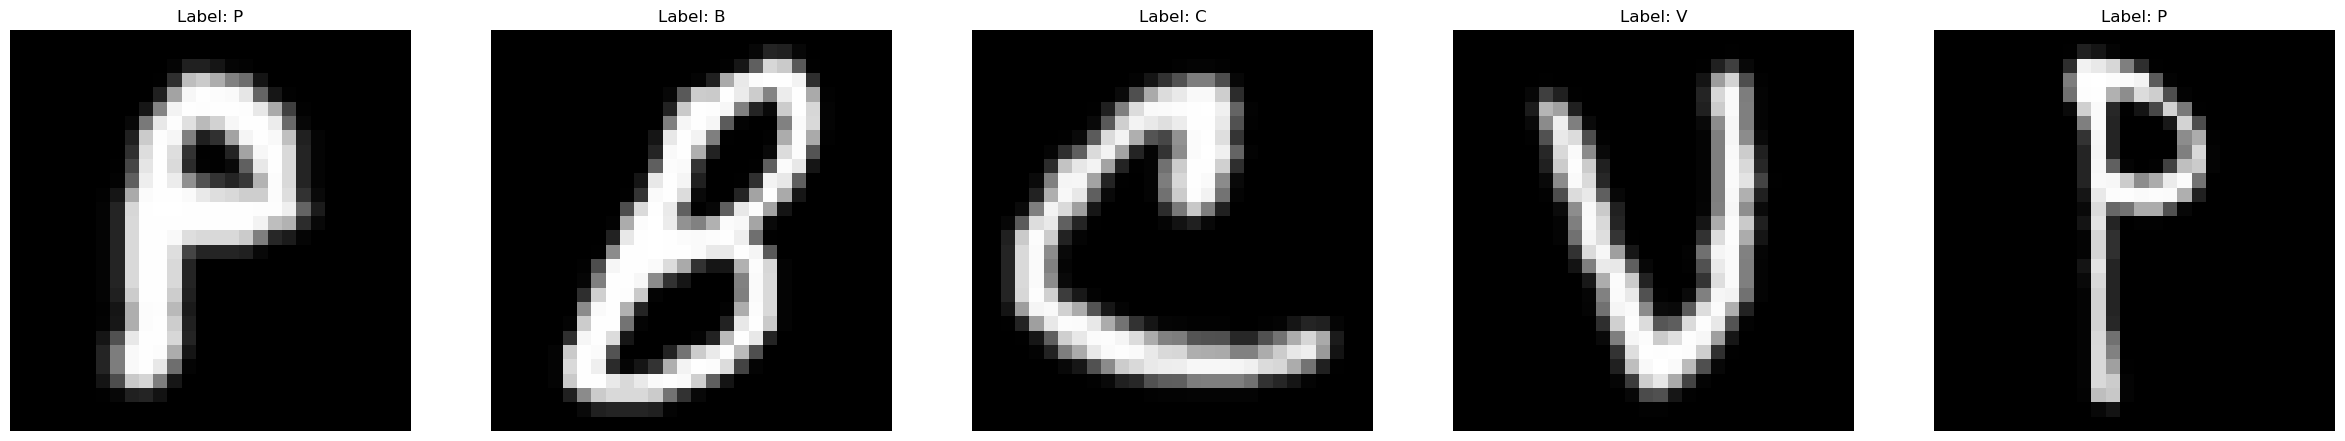

In [32]:
# Visualisasi beberapa contoh gambar ---
def visualize_images(dataframe, n=5):
    plt.figure(figsize=(30, 30))
    for i in range(n):
        image = dataframe.iloc[i, 1:].values.reshape(28, 28).T  # EMNIST perlu transpose
        label = chr(dataframe.iloc[i, 0] + 64)  # EMNIST label: 1=A, ..., 26=Z
        plt.subplot(1, n, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

visualize_images(df_balanced)

In [33]:
# Siapkan X dan y ---
X = df_balanced.iloc[:, 1:].values  # pixel values
y = df_balanced.iloc[:, 0].values   # class labels

In [34]:
# Split 80% train, 20% test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("Jumlah data train:", X_train.shape[0])
print("Jumlah data test :", X_test.shape[0])

Jumlah data train: 2080
Jumlah data test : 520


### 2. Feature Extraction Using HOG

In [35]:
# Fungsi Ekstraksi HOG ---
def extract_hog_features(images, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    hog_features = []
    for img in images:
        img_reshaped = img.reshape((28, 28)).T  # Transpose agar tidak terbalik
        features = hog(img_reshaped,
                       orientations=orientations,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       block_norm='L2-Hys',
                       visualize=False)
        hog_features.append(features)
    return np.array(hog_features)

In [36]:
# Contoh penggunaan dengan parameter non-default ---
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (4, 4),
    'cells_per_block': (2, 2)
}

In [37]:
# Ekstraksi fitur HOG dari training dan test set
X_train_hog = extract_hog_features(X_train, **hog_params)
X_test_hog = extract_hog_features(X_test, **hog_params)

print("Dimensi fitur HOG (train):", X_train_hog.shape)
print("Dimensi fitur HOG (test):", X_test_hog.shape)

Dimensi fitur HOG (train): (2080, 1296)
Dimensi fitur HOG (test): (520, 1296)


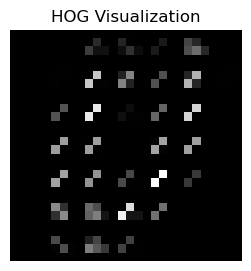

In [38]:
# Visualisasi hasil HOG
idx = 0  
selected_image = X_train[idx].reshape(28, 28).T  # Transpose agar tidak terbalik

# Ekstraksi fitur HOG dengan visualisasi
feature, hog_img = hog(selected_image,
                       orientations=9,
                       pixels_per_cell=(4, 4),
                       cells_per_block=(2, 2),
                       visualize=True,
                       block_norm='L2-Hys')

# Visualisasi hasil HOG
plt.figure(figsize=(6, 3))
plt.imshow(hog_img, cmap='gray')
plt.title("HOG Visualization")
plt.axis('off')
plt.show()

### 3. Classification

In [39]:
# Definisikan parameter grid untuk GridSearch ---
param_grid = {
    'C': [1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [40]:
# Inisialisasi model SVM ---
svc = SVC()

In [41]:
#  Lakukan Grid Search dengan Cross Validation ---
grid_search = GridSearchCV(svc, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_hog, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=1)

In [42]:
# Mencari Best Parameters ---
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


### 4. Evaluation

In [43]:
# Evaluasi pada data test ---
y_pred_test = grid_search.predict(X_test_hog)
print("\nTest accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred_test))


Test accuracy: 0.8115384615384615

Classification Report (Test):
               precision    recall  f1-score   support

           1       0.72      0.65      0.68        20
           2       0.81      0.85      0.83        20
           3       0.89      0.85      0.87        20
           4       0.90      0.90      0.90        20
           5       0.86      0.90      0.88        20
           6       0.89      0.85      0.87        20
           7       0.67      0.70      0.68        20
           8       0.75      0.75      0.75        20
           9       0.65      0.65      0.65        20
          10       0.73      0.80      0.76        20
          11       1.00      0.85      0.92        20
          12       0.62      0.65      0.63        20
          13       0.74      0.70      0.72        20
          14       0.70      0.80      0.74        20
          15       0.91      1.00      0.95        20
          16       0.80      0.80      0.80        20
          17  

In [44]:
# Evaluasi Data Test ---
y_pred_test = grid_search.predict(X_test_hog)

print("\n=== Performance on Testing Set ===")
print("Accuracy :", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, average='macro'))
print("Recall   :", recall_score(y_test, y_pred_test, average='macro'))
print("F1-Score :", f1_score(y_test, y_pred_test, average='macro'))


=== Performance on Testing Set ===
Accuracy : 0.8115384615384615
Precision: 0.8159110433844584
Recall   : 0.8115384615384615
F1-Score : 0.8115765546184114


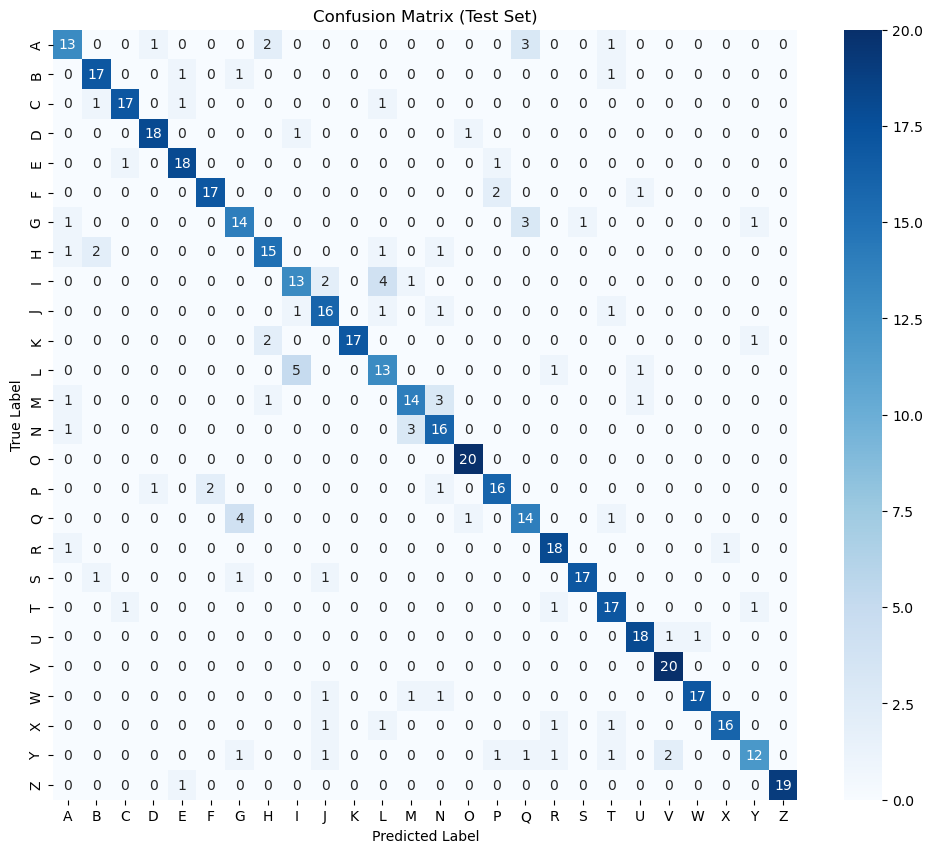

In [45]:
# Confusion Matrix untuk Data Testing ---
conf_mat = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[chr(i+64) for i in range(1, 27)],
            yticklabels=[chr(i+64) for i in range(1, 27)])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Set)")
plt.show()

=== Performance on Training Set ===
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0


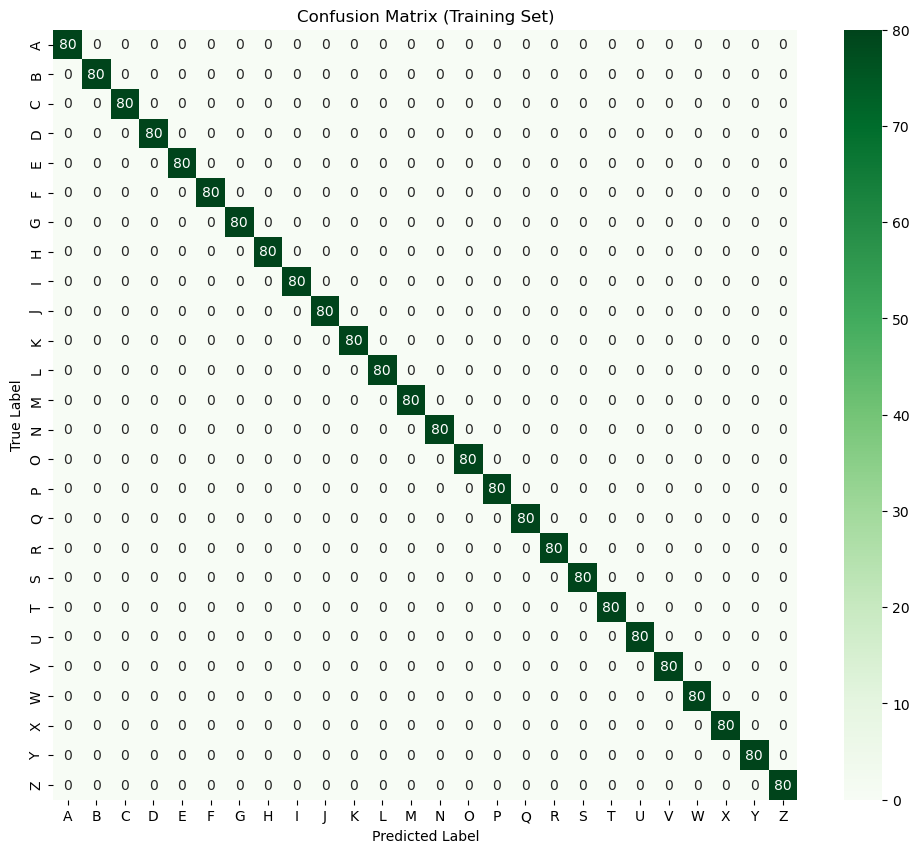

In [46]:
# Evaluasi Data Training ---
y_pred_train = grid_search.predict(X_train_hog)

print("=== Performance on Training Set ===")
print("Accuracy :", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, average='macro'))
print("Recall   :", recall_score(y_train, y_pred_train, average='macro'))
print("F1-Score :", f1_score(y_train, y_pred_train, average='macro'))


# Confusion Matrix untuk Data Training ---
conf_mat = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels=[chr(i+64) for i in range(1, 27)],
            yticklabels=[chr(i+64) for i in range(1, 27)])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Training Set)")
plt.show()

### Test 20%

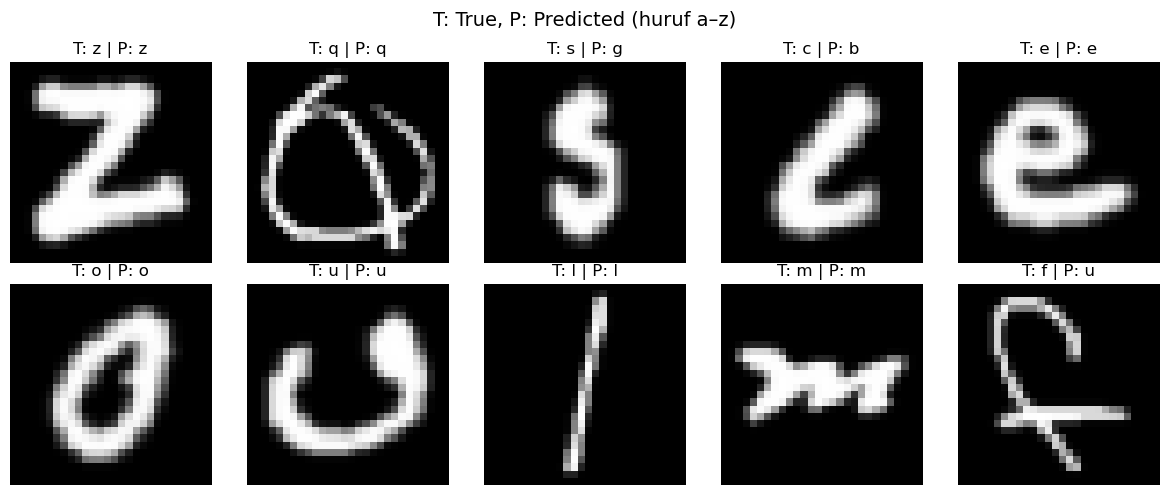

In [48]:
import random

# Pilih 10 indeks acak dari data uji
indices = random.sample(range(len(X_test)), 10)

# Buat figure
plt.figure(figsize=(12, 5))

for i, idx in enumerate(indices):
    img = X_test[idx].reshape(28, 28).T  # Transpose agar orientasi sesuai
    true_label = y_test[idx]
    pred_label = y_pred_test[idx]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T: {chr(true_label + 96)} | P: {chr(pred_label + 96)}")  # chr(97) = 'a'
    plt.axis('off')

plt.suptitle("T: True, P: Predicted (huruf a–z)", fontsize=14)
plt.tight_layout()
plt.show()
